# Project 3: IMDb movie data investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>  
<li><a href="#wrangling">Data Wrangling</a></li>
<a href="#1. Observe">1. Observe the dataset</a>      
<a href="#2. Data">2. Data cleaning</a>      
<a href="#3. Review">3. Review the question again</a>     
<li><a href="#eda">Exploratory Data Analysis</a></li>
<a href="#the relation between vote and the release">1. What is the relation between vote and the release month? </a>  
<a href="#week">2. Which week day has the highest profit?</a>  
<a href="#Which month has the highest">3. Which month has the highest profit?</a>  
<a href="#Which genre of movie is">4. Which genre of movie is more popular?</a>      
<a href="#Which production company earn">5. Which production company earn much ?</a>      
<a href="#Whether people tend to">6. Whether people tend to like short-time movies than long-time movies or not?n</a>  
<li><a href="#conclusions">Conclusions</a></li>   
</ul>

<a id='intro'></a>
## Introduction

This dataset,tmdb-movies.csv, is base on the kaggle dataset 'TMDB 5000 Movie Dataset'. In this dataset we can see the popularity, budget, revenue, directory ,etc. variable for more than 10,000 movies.

In the investigation base on this dataset I would like to find out:   
>1. What is the relation between vote and the release month?  
>2. Which week day has the highest profit?
>3. Which month has the highest profit?
>4. Which genre of movie is more popular?
>5. Which production company earn much ?
>6. Whether people tend to like short-time movies than long-time movies or not?



In [135]:
# import the required package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
<a id='1. Observe'></a>
### 1. Observe the dataset

Loading the csv file in the begining of the investigation.
In the next cell I will print out a few lines to take a brief look in it .

In [136]:
# Load data
df = pd.read_csv('tmdb-movies.csv',sep=',')
df.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.   

       ...                                                overview runtime  \
0      ...       Twenty-two years after the events of Jurassic ...     124   
1      ...       An apocalyptic story set in the furthest reach...     120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  

[2 rows x 21 columns]

There is totally full of messing data inside. Take a quick scan of dataset and find out it can be separated into 4 big categories as **General information** of original_title, overview, director, production_companies, genre, etc., and **Popularity** of popularity, vote_count, vote_average, and **Finance issue** of budget, revenue and in which they are related, and last **release date**.   


Take a look into details of each column, and see the shape of it.

In [137]:
# information of details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [138]:
# Take a look of the shape of the dataframe
df.shape

(10866, 21)

In the information on the top, we can see there is 21 columns and 10,866 rows included in the dataframe, and few of them have missing value.
The next step, I will first drop the column I desided not to use for this investigation and try to fill in the missing values.  

<a id='2. Data'></a>
### 2. Data cleaning
<a id='a'></a>
#### a. Drop the unuse columns

After the observation of the dataframe, I would like to drop tagline, keyword, overview and homepage of general data since they have little to do with my investigation.

In [139]:
# Drop the tagline, keyword, overview, id, imdb_id and homepage of this dataframe.
df.drop(['tagline','keywords','overview','homepage','id','imdb_id'],axis=1, inplace=True)

Take a look in the new dataframe

In [140]:
df.head(1)

popularity     budget     revenue  original_title  \
0   32.985763  150000000  1513528810  Jurassic World   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09

Create histogram of the rest of the columns below:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3A4C11BA8>,
      dtype=object)

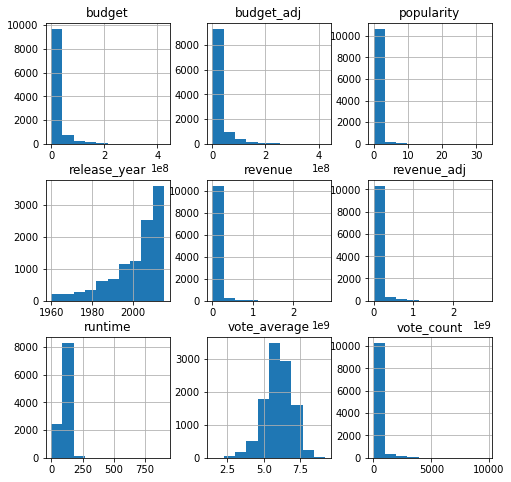

In [141]:
df.hist(figsize=(8,8))

We can see that in **Finance issue**, budget and revenue tend to be right skew. The popularity and vote_count are also right skew;  
The vote_average tend to be normal distribution with its mean fall in nearly 6;    
According to the release_date, after 2000,the production of movies increased sharply compared with the previous period;  
       
I will create a graph for runtime respectively below:

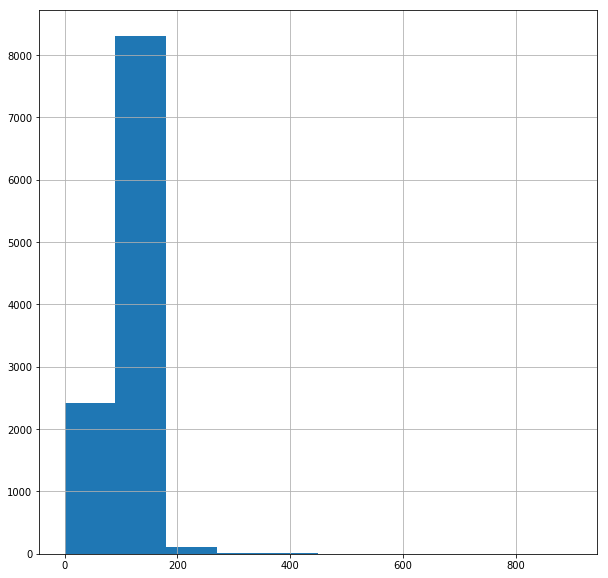

In [142]:
# create a respective graph for runtime
df.runtime.hist(figsize=(10,10))

we can also see that most of the length of movies falls between 90 and 180 minutes.

I am wondering the relation between popularity and vote_count, so I plot a scatter graph to look into it below:

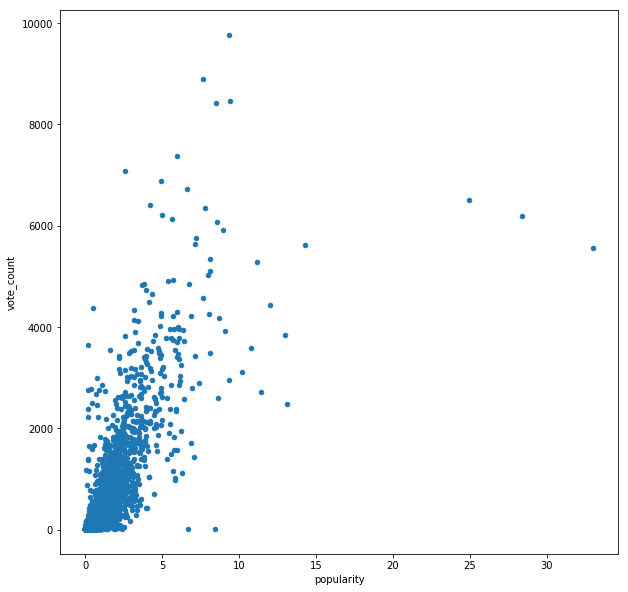

In [143]:
df.plot(x='popularity',y='vote_count',kind='scatter',figsize=(10,10))

It seems relationship between popularity and vote_count is positively correlated

<a id='b'></a>
#### b. deal with the missing value

Let's see how many missing value in the rest of the columns.

In [144]:
# sum up the missing data of each column
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There is 1030 missing value in production_companies. It won't be the best idea to drop all the row with missing data, but I tought there is no other better way to replace the null value in production_companies. So finally I choose to drop them.

In [145]:
# drop all rows with missing data
df.dropna(inplace=True)

See if there is any missing value left

In [146]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [147]:
# view the information of the rest of parts
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 15 columns):
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


<a id='c'></a>
#### c. Extract month and week day data as new column

According to my question_1 ,question_2 and question_3,it seems I have to pull out the month and week_day data necessarily. So I will extract the month value and week_day value repectively from release_date to be new cloumns

In [148]:
# first, we change the release_date column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
# then, extract month data out to be a new column "month"
df['month'] = df['release_date'].dt.month
# extract week_day data out to be a new column "week_day"
df['week_day'] = df['release_date'].dt.weekday

In [149]:
# see if it is work
df.head(2)

popularity     budget     revenue      original_title  \
0   32.985763  150000000  1513528810      Jurassic World   
1   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   

   vote_average  release_year    budget_adj   revenue_adj  month  week_day  
0           6.5          2015  1.379999e+08  1.392446e+09      6         1  
1           7.1          2015  1.379999e+08  3.481613e+08      5         2

<a id='d'></a>
#### d. create a profit column

To anwser the question_2 and question_3, I have to create a new column of profit to make it easy to visualize.  
In this case, I will do it as revenue-budget.

In [150]:
# create a new column of profit
df['profit'] = df['revenue']-df['budget'] 
df.profit.head()

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
Name: profit, dtype: int64

<a id='3. Review'></a>
### 3. Review the question again

>Now I finished cleaning the dataset. Let's see if there is anything I didn't clean yet by reviewing the questoin:  
1. What is the relation between **vote** and the release **month**?  
2. Which **week day** has the highest **profit**?  
3. Which **month** has the highest **profit**?  
4. Which **genre** of movie is more popular?  
5. Which **production company** earn much ?  
6. Whether people tend to like short-time movies than long-time movies or not?  


#### subset what column is actually need

In [151]:
# subset what I actually need
df_cleam = df[['month','week_day','vote_count','vote_average','profit','genres','production_companies','runtime']].copy()
df_cleam.head()

month  week_day  vote_count  vote_average      profit  \
0      6         1        5562           6.5  1363528810   
1      5         2        6185           7.1   228436354   
2      3         2        2480           6.3   185238201   
3     12         1        5292           7.5  1868178225   
4      4         2        2947           7.3  1316249360   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies  runtime  
0  Universal Studios|Amblin Entertainment|Legenda...      124  
1  Village Roadshow Pictures|Kennedy Miller Produ...      120  
2  Summit Entertainment|Mandeville Films|Red Wago...      119  
3          Lucasfilm|Truenorth Productions|Bad Robot      136  
4  Universal Pictures|Original Film|Media Rights ...      137

Now I got what I need. Let's move to the Exploratory part.

<a id='eda'></a>
## Exploratory Data Analysis

<a id='the relation between vote and the release'></a>
### 1. What is the relation between vote and the release month? 

In [152]:
# extract month and vote data
Month_vote = df_cleam.groupby('month')['vote_average'].mean()
Month_vote = Month_vote.to_frame().reset_index()

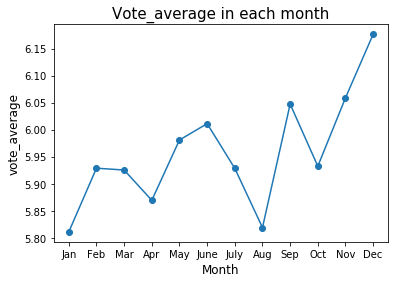

In [91]:
# create a line graph of Month_vote
month_name = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_name,Month_vote['vote_average'].values, marker = 'o');
plt.title('Vote_average in each month',fontsize = 15)
plt.xlabel('Month',fontsize = 12)
plt.ylabel('vote_average',fontsize = 12);

In this graph, we can see the vote_average reach to 6.5 points in September, November and December, and the second high peak is in June;  
January and August both have lower vote_average near 5.8 points.


<a id='week'></a>
### 2. Which week day has the highest profit?


In [153]:
# extract month and vote data
week_prof = df_cleam.groupby('week_day')['profit'].mean()
week_prof = week_prof.to_frame().reset_index()

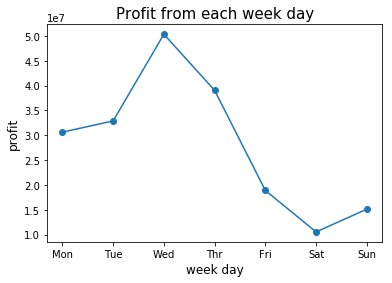

In [154]:
# plot a graph
week_name = ['Mon','Tue','Wed','Thr','Fri','Sat','Sun']
plt.plot(week_name,week_prof['profit'].values, marker = 'o');
plt.title('Profit from each week day',fontsize = 15)
plt.xlabel('week day',fontsize = 12)
plt.ylabel('profit',fontsize = 12);

At beginning, I thought it is more likely that people spend much money on the movie in weekend and the film conpany earn much in weekend as well. While seeing this graph, I find I am totally wrong.  
As we can see, the high peak of the profit of the movie is on Wednesday, and the lower point of the profit is on Saturday.

<a id='Which month has the highest'></a>
### 3. Which month has the highest profit?  

In [155]:
# extract month and profit data
Month_prof = df_cleam.groupby('month')['profit'].mean()
Month_prof = Month_prof.to_frame().reset_index()

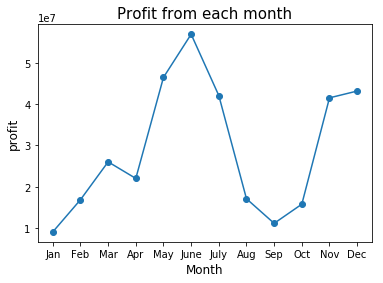

In [156]:
# create a line graph of Month_prof
month_name = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_name,Month_prof['profit'].values, marker = 'o');
plt.title('Profit from each month',fontsize = 15)
plt.xlabel('Month',fontsize = 12)
plt.ylabel('profit',fontsize = 12);

Take a look into this graph and we can easily find out that the profit in different month have 2 peaks, both in summer and winter.
In May,June,July,November and December, movie company got higher profit. In June, the profit reach to the top.

<a id='Which genre of movie is'></a>
### 4. Which genre of movie is more popular?  

#### split multiple value in cell of genres and assign them to new row

In [157]:
new = df[df['genres'].str.contains('|')]
len(new)

9773

Woo, it seems every row of genres has multiple values

Honestly this is the most difficult part of this dataset,since the number of genres of each row is not as the same.  
I refer to [# this page](https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows) to get the idea to figure out the solution.

In [158]:
def split(data, column, sep='|', keep=False):
    indexes = list()
    new_values = list()
    data = data.dropna(subset=[column])
    for i, presplit in enumerate(data[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = data.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df
df_genres = split(df_cleam,'genres', sep='|').copy()
# see if it work
df_genres.head(4)

month  week_day  vote_count  vote_average      profit           genres  \
0      6         1        5562           6.5  1363528810           Action   
0      6         1        5562           6.5  1363528810        Adventure   
0      6         1        5562           6.5  1363528810  Science Fiction   
0      6         1        5562           6.5  1363528810         Thriller   

                                production_companies  runtime  
0  Universal Studios|Amblin Entertainment|Legenda...      124  
0  Universal Studios|Amblin Entertainment|Legenda...      124  
0  Universal Studios|Amblin Entertainment|Legenda...      124  
0  Universal Studios|Amblin Entertainment|Legenda...      124

First I want to see the distribution of each genres

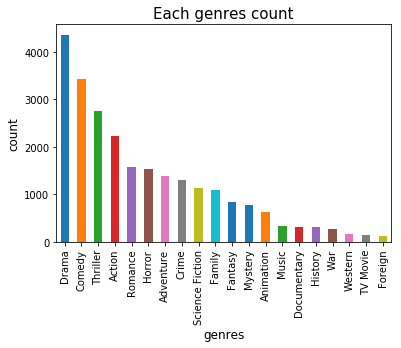

In [159]:
# count each genres
genres_count = df_genres.genres.value_counts()
# plot the count of each genres
genres_count.plot(kind = 'bar');
plt.title('Each genres count',fontsize = 15)
plt.xlabel('genres',fontsize = 12)
plt.ylabel('count',fontsize  = 12);

We can see the top 4 genres are Drama, Comedy, Thriller and Action in order, and the number of Drama is nearly 2 times as Action movie.

Secondly, I would like to find out which genres has the highest vote_average.

In [160]:
# group each genres and pull the mean of vote_average
genres_vote = df_genres.groupby('genres')['vote_average'].mean()
genres_vote = genres_vote.to_frame().reset_index()

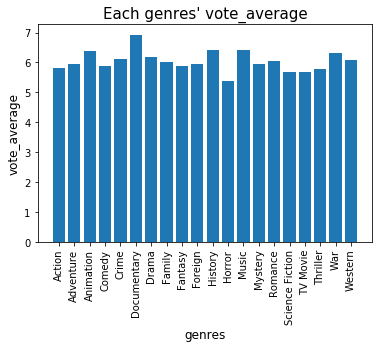

In [161]:
# plot vote_average of each genres
plt.bar(genres_vote['genres'], genres_vote['vote_average'].values);
plt.title("Each genres' vote_average",fontsize = 15)
plt.xticks(rotation=90)
plt.xlabel('genres',fontsize = 12)
plt.ylabel('vote_average',fontsize = 12);

In the top bar plot, we can find out the high peak of each genres vote_average is not obvious.  
Still we can point out that Documentary has highest vote_average. 

<a id='Which production company earn'></a>
### 5. Which production company earn much ?  

#### split multiple value in cell of production company and assign them to new row

In [163]:
# call function
df_com = split(df_cleam,'production_companies', sep='|').copy()
# print first 4 line
df_com.head(4)

month  week_day  vote_count  vote_average      profit  \
0      6         1        5562           6.5  1363528810   
0      6         1        5562           6.5  1363528810   
0      6         1        5562           6.5  1363528810   
0      6         1        5562           6.5  1363528810   

                                      genres     production_companies  runtime  
0  Action|Adventure|Science Fiction|Thriller        Universal Studios      124  
0  Action|Adventure|Science Fiction|Thriller     Amblin Entertainment      124  
0  Action|Adventure|Science Fiction|Thriller       Legendary Pictures      124  
0  Action|Adventure|Science Fiction|Thriller  Fuji Television Network      124

In [175]:
# group by company
com_prof = df_com.groupby('production_companies')['profit'].mean()
com_prof = com_prof.to_frame().reset_index()
com_prof
# extract top 10 company
com_prof = com_prof.sort_values(by='profit',  ascending=False)
# com_prof.head()
com_top10_prof = com_prof.iloc[0:10,:]
com_top10_prof

production_companies        profit
7207              Truenorth Productions  1.868178e+09
3134     Harry Potter Publishing Rights  7.882127e+08
1651                         Cool Music  7.882127e+08
4247  MIRACLE Productions GmbH & Co. KG  7.766885e+08
1978                 Disney Enterprises  7.706260e+08
6175            Second Mate Productions  7.633299e+08
5318     Patalex IV Productions Limited  7.459210e+08
61                               3Foot7  7.051198e+08
4053           Lightstorm Entertainment  6.917692e+08
5100                     One Race Films  6.833230e+08

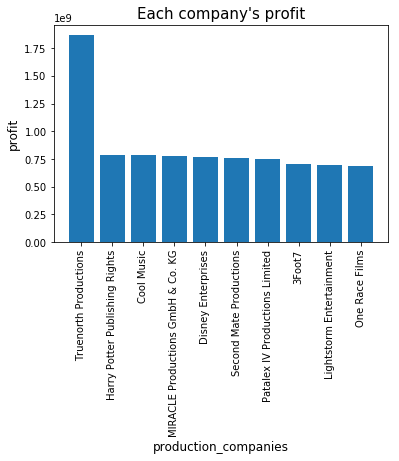

In [174]:
# plot the profit of each company
plt.bar(com_top10_prof['production_companies'], com_top10_prof['profit'].values);
plt.title("Each company's profit",fontsize = 15)
plt.xticks(rotation=90)
plt.xlabel('production_companies',fontsize = 12)
plt.ylabel('profit',fontsize = 12);

We can find out that 'Truenorth Productions' has the highest profit and it is even greater than 2 times of other company.

<a id='Whether people tend to'></a>
### 6. Whether people tend to like short-time movies than long-time movies or not?  

In this case, I assume people like the movie with higher vote_average.

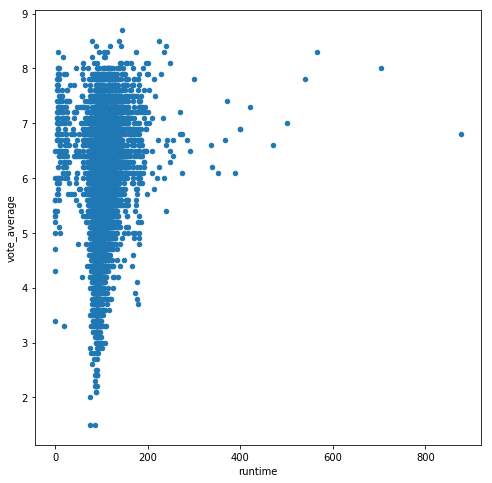

In [176]:
# scatter plot 
df_cleam.plot(x='runtime',y='vote_average',kind='scatter',figsize=(8,8))

It seems there is no obvious positive relationship between runtime and vote_average. We cannot figure out whether people tend to like short-time movies than long-time movies.

<a id='conclusions'></a>
## Conclusions


### Conclusion 1.  Vote & Month

As the answers of question1, we can find out vote averages in Winter, especially December, are higher than vote averages in Summer. I guess maybe it has a little to do with the holiday such as Chistmas. Maybe we can do more further research to find out it.

### Conclusion 2.  Profit issue

In the answers of question2,question3 and question5,  
1. we find out that there are more profits on Wednesday than the other day in week.It is quite surprising me about it.  
2. And there are more profits in June and December.The distribution tend to be binary-peak.
3. Last,'Truenorth Productions' earn a lot.

### Conclusion 3. Genres issue

According to the answer of question4 ,there is more drama than other kinds of movie, and it is not obvious of people's preferences amomg each genres.

### Conclusion 4. Runtime issue

The answer of the last question tell that there is no obvious positive relationship of runtime and vote.